In [19]:
import os
from pathlib import Path
import scanpy as sc
from matplotlib import pyplot as plt
from matplotlib import rc_context

In [20]:
os.chdir(Path().resolve())
os.getcwd()

'/home/wu/datb1/AutoExtractSingleCell/03.skin_phase2/integrate_input_claude_3_5/all_output_copy'

In [21]:
adata_all = sc.read_h5ad('integrated_dataset.h5ad')

## Manual Clustering

In [22]:
adata_all.obs['Dataset'] = adata_all.obs['Dataset'].astype(str).str.replace(' claude 3 5 extracted.h5ad', '')

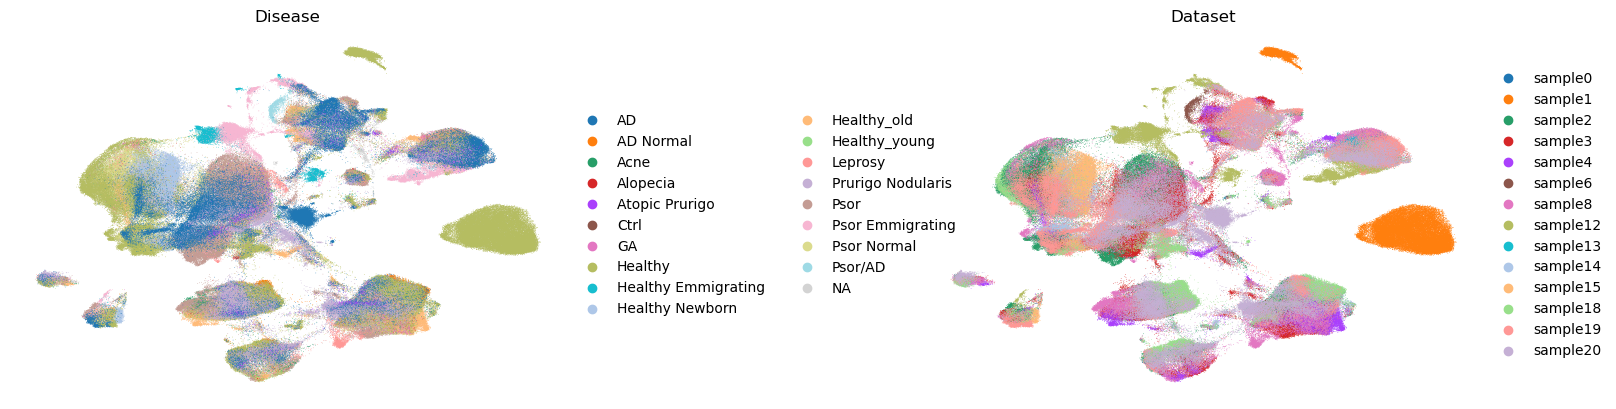

In [23]:
sc.pl.umap(adata_all, color=['Disease', 'Dataset'], frameon=False, wspace=0.5, size=1)

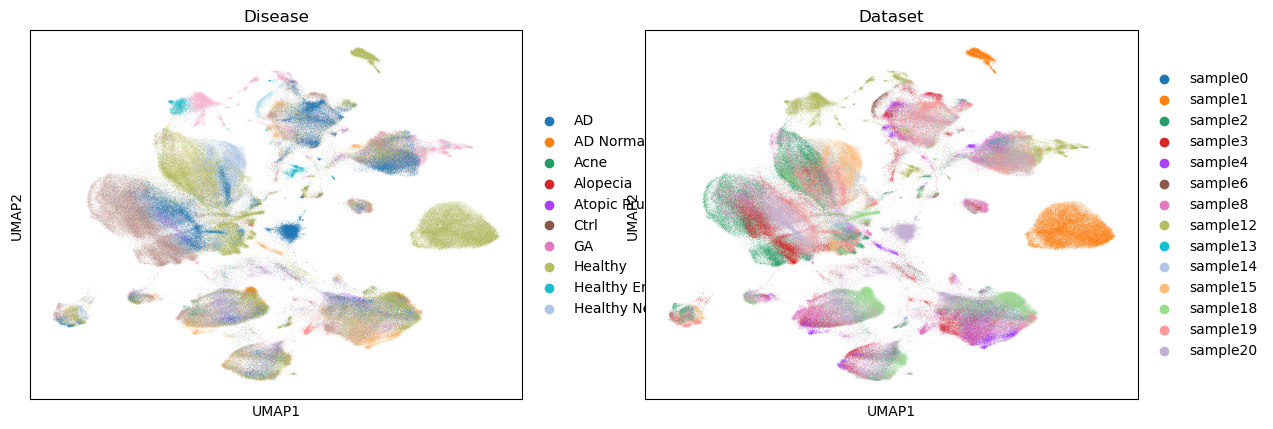

In [24]:
sc.pp.neighbors(adata_all, use_rep='X_scanorama', n_neighbors=30)
sc.tl.leiden(adata_all, resolution=0.5, key_added='leiden_scanorama')
sc.tl.umap(adata_all)
sc.pl.umap(adata_all, color=['Disease', 'Dataset'])

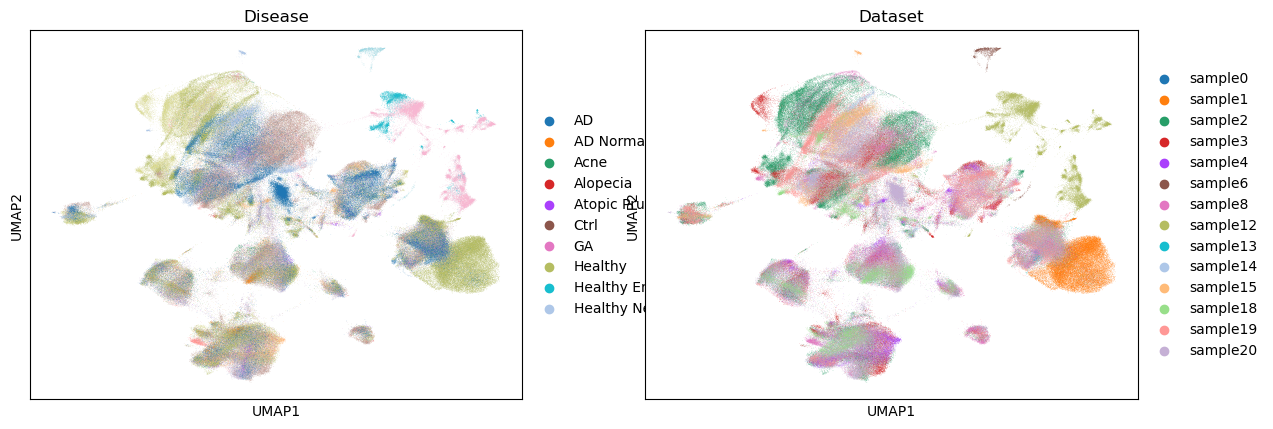

In [25]:
sc.pp.neighbors(adata_all, use_rep='X_scanorama_prior', n_neighbors=30)
sc.tl.leiden(adata_all, resolution=0.5, key_added='leiden_scanorama_prior')
sc.tl.umap(adata_all)
sc.pl.umap(adata_all, color=['Disease', 'Dataset'])

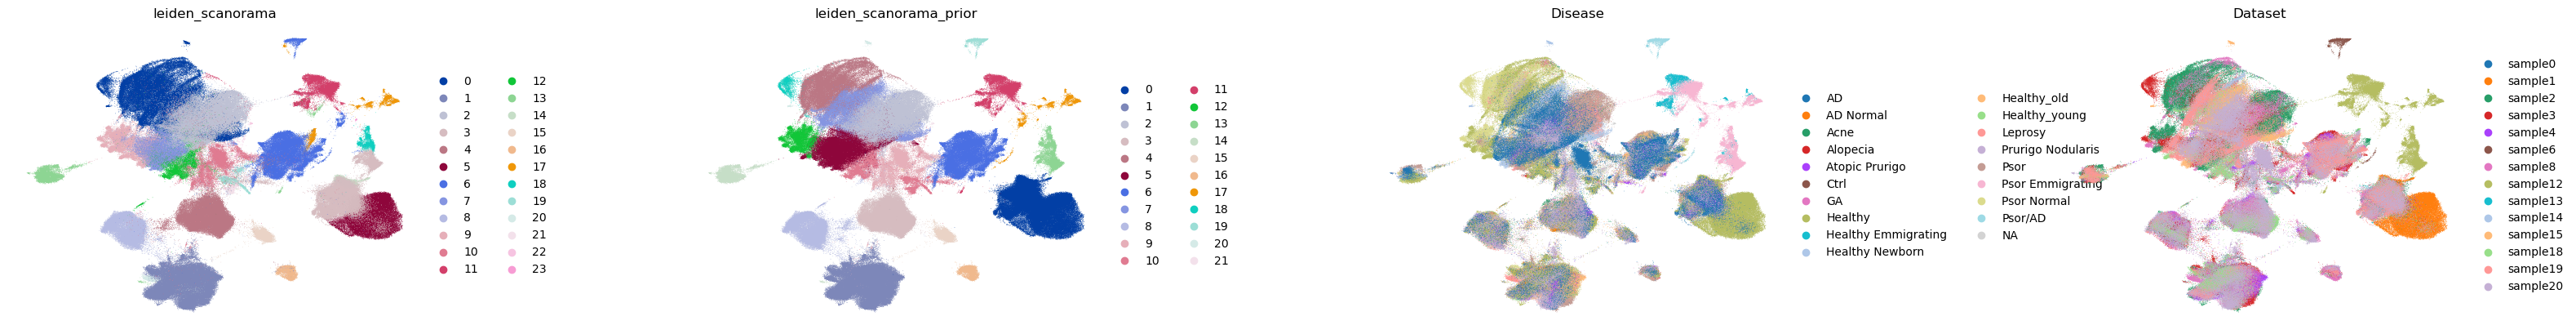

In [26]:
sc.pl.umap(adata_all, color=['leiden_scanorama', 'leiden_scanorama_prior', 'Disease', 'Dataset'], frameon=False, wspace=0.5, size=1)

In [27]:
import importlib
import scextract
# importlib.reload(scextract.utils.utils)
from scextract.utils import utils as scu
major_voting_df = scu.major_vote_top_clusters(adata_all.obs, leiden_key='leiden_scanorama_prior')
annotation_dict, reasonings = scu.majority_voting_cluster_annotation(major_voting_df, config_path='/home/wu/datb1/AutoExtractSingleCell/03.skin_phase2/config.ini')

Majority voting annotation in progress...


In [28]:
annotation_dict

{0: 'CD4-positive T cell',
 1: 'Fibroblast',
 2: 'Suprabasal keratinocyte',
 3: 'Vascular endothelial cell',
 4: 'Suprabasal keratinocyte',
 5: 'Basal keratinocyte',
 6: 'Dendritic cell',
 7: 'Spinous keratinocyte',
 8: 'Smooth muscle cell',
 9: 'Unknown',
 10: 'Keratinocyte',
 11: 'Keratinocyte',
 12: 'Basal keratinocyte',
 13: 'T cell',
 14: 'Melanocyte',
 15: 'Lymphatic endothelial cell',
 16: 'Mast cell',
 17: 'Dendritic cell',
 18: 'Keratinocyte',
 19: 'Dendritic cell',
 20: 'Endothelial cell',
 21: 'Keratinocyte'}

/home/wu/datb1/AutoExtractSingleCell/scExtract/src/scextract/utils/utils.py:214: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()  # Increase padding around the entire figure


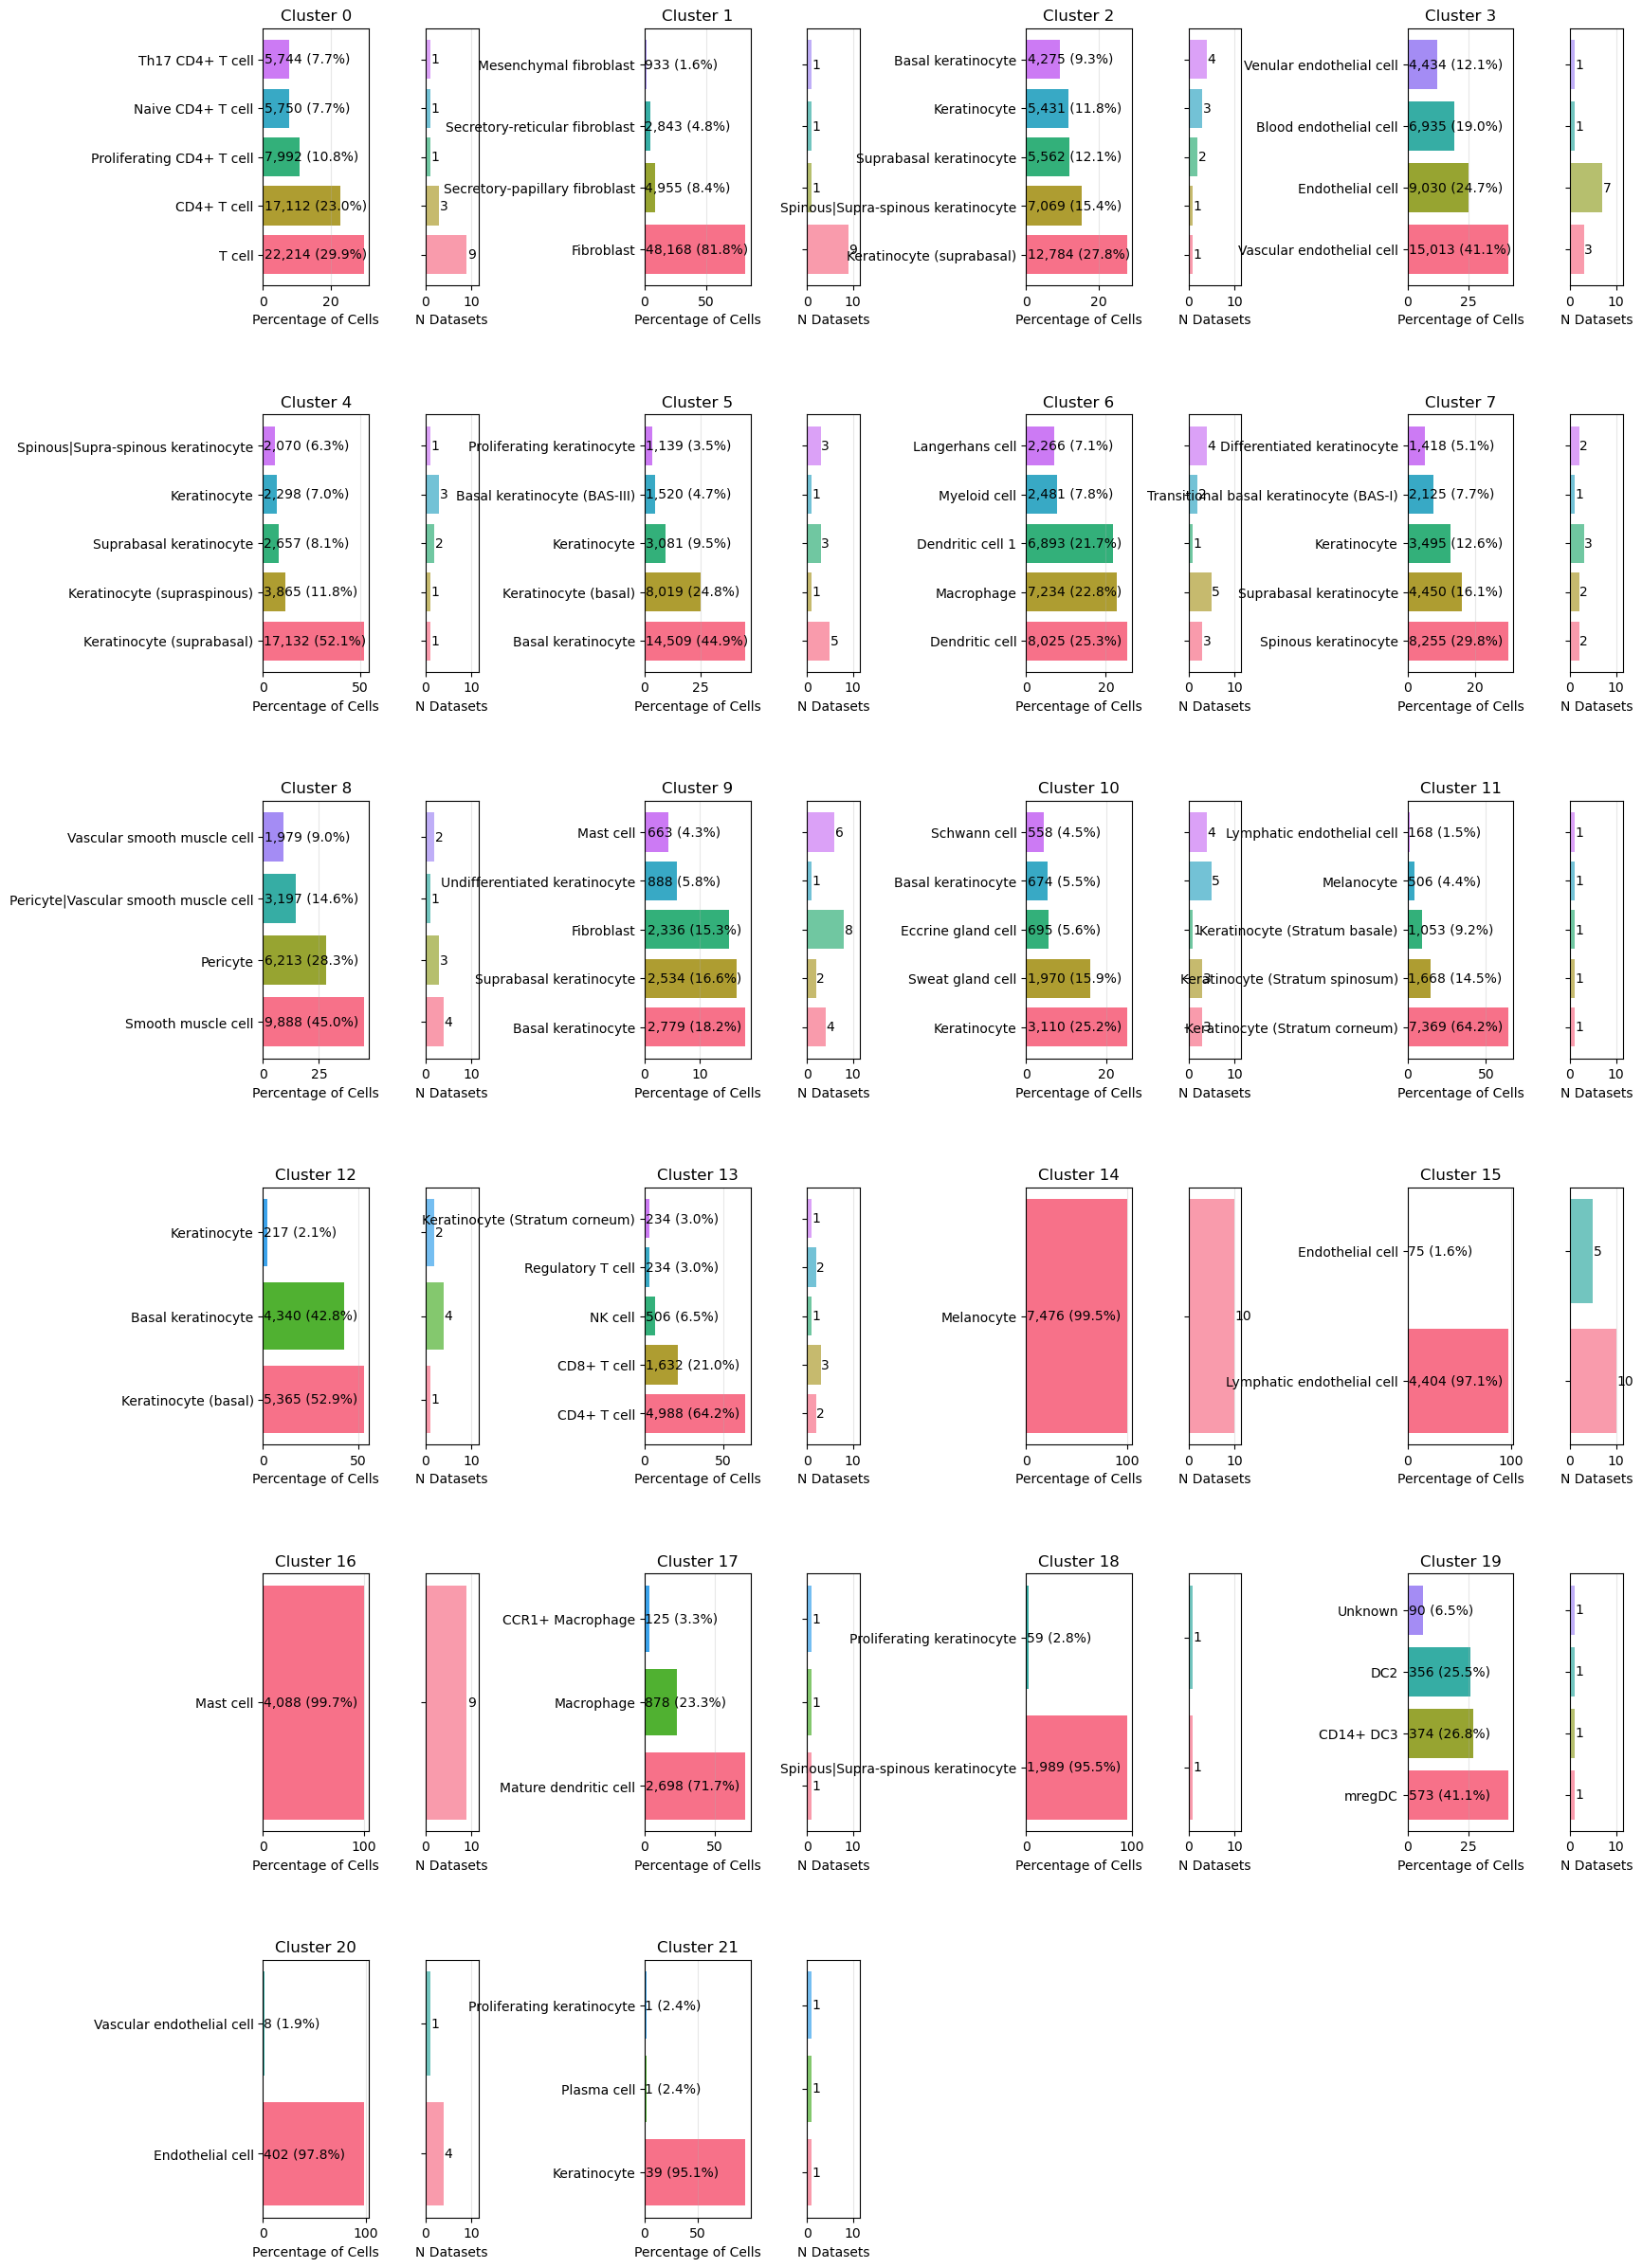

In [ ]:
major_voting_df = scu.major_vote_top_clusters(adata_all.obs, leiden_key='leiden_scanorama_prior')
fig = scu.plot_multiple_cluster_composition(major_voting_df, figsize=(20, 5), ncols=4)
plt.savefig('fig3/majority_voting_cluster_composition.pdf', bbox_inches='tight')

In [30]:
adata_all.obs['cell_type_leiden'] = adata_all.obs.leiden_scanorama_prior.astype(int).map(annotation_dict)

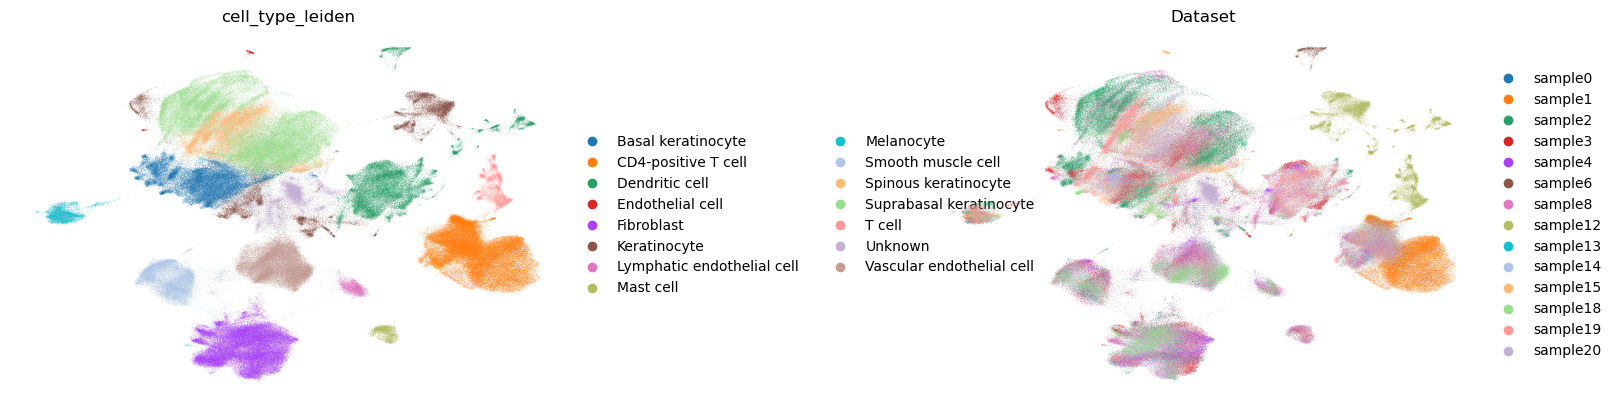

In [31]:
sc.pl.umap(adata_all, color=['cell_type_leiden', 'Dataset'], frameon=False, wspace=0.5)

In [32]:
adata_all.obs.loc[adata_all.obs['Disease'] == 'Ctrl', 'Disease'] = 'Healthy'

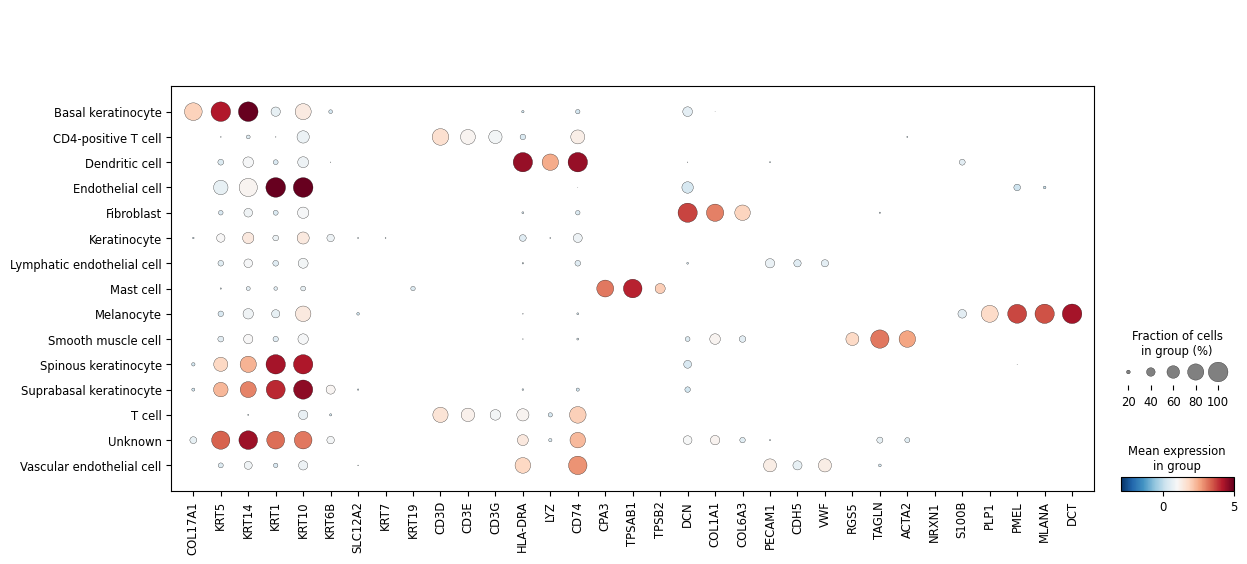

In [33]:
marker_genes = ["COL17A1", "KRT5", "KRT14", "KRT1", "KRT10", "KRT6B", "SLC12A2", "KRT7", "KRT19","CD3D","CD3E","CD3G",
                "HLA-DRA", "LYZ", "CD74","CPA3","TPSAB1","TPSB2",
                "DCN","COL1A1","COL6A3","PECAM1","CDH5","VWF","RGS5","TAGLN","ACTA2",
                "NRXN1","S100B","PLP1","PMEL", "MLANA", "DCT"]

with rc_context({'figure.figsize': (8, 7)}):
    sc.pl.dotplot(adata_all, marker_genes, groupby='cell_type_leiden', show=False, use_raw=True, dot_max=1, dot_min=0.1, color_map='RdBu_r', vmax=5, vmin=-3)

In [ ]:
adata_all.write('integrated_dataset_processed.h5ad')